In [3]:
!pip install pandas scikit-learn matplotlib seaborn nltk


In [5]:
import pandas as pd

# Load sample sentiment dataset
df = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
df = df[['label', 'tweet']]
df.head()


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['tweet'].apply(preprocess)
df[['tweet', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit cant use caus dont...
2,bihday your majesty,bihday majesti
3,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,factsguide: society now #motivation,factsguid societi motiv


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.33      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393



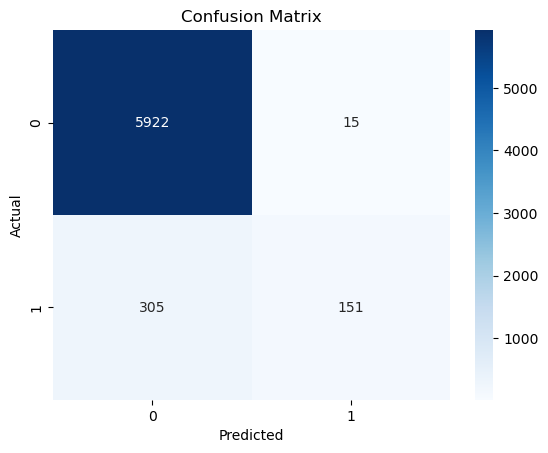

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
def predict_sentiment(text):
    cleaned = preprocess(text)
    vector = vectorizer.transform([cleaned])
    pred = model.predict(vector)
    return "Positive" if pred[0] == 1 else "Negative"

predict_sentiment("I hate this movie!")


'Negative'